<a href="https://colab.research.google.com/github/yamada2310/dataAnalysis100/blob/main/dataAnalysis100_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/100knock-data_analytics/5章')

In [3]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [4]:
year_months = list(uselog_months["年月"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
  tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]].copy()
  tmp.rename(columns={"count":"count_0"},inplace=True)
  tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]].copy()
  del tmp_before["年月"]
  tmp_before.rename(columns={"count":"count_1"},inplace=True)
  tmp = pd.merge(tmp,tmp_before, on="customer_id",how="left")
  uselog=pd.concat([uselog,tmp],ignore_index=True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [5]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1].copy()
exit_customer["exit_date"]=None
exit_customer["end_date"]=pd.to_datetime(exit_customer["end_date"])
for i in exit_customer.index:
  exit_customer.loc[i,"exit_date"]=exit_customer.loc[i,"end_date"]-relativedelta(months=1)
exit_customer["exit_date"]=pd.to_datetime(exit_customer["exit_date"])
exit_customer["年月"]=exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog=pd.merge(uselog,exit_customer,on=["customer_id","年月"],how="left")
print(len(uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [6]:
exit_uselog=exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [7]:
conti_customer=customer.loc[customer["is_deleted"]==0]
conti_uselog=pd.merge(uselog,conti_customer,on=["customer_id"],how="left")
print(len(conti_uselog))
conti_uselog=conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [8]:
conti_uselog=conti_uselog.sample(frac=1,random_state=0).reset_index(drop=True)
conti_uselog=conti_uselog.drop_duplicates(subset="customer_id")
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaN,CA1,...,オールタイム,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaN,CA1,...,オールタイム,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaN,CA1,...,ナイト,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaN,CA1,...,オールタイム,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0


In [9]:
predict_data = pd.concat([conti_uselog,exit_uselog],ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT


In [10]:
predict_data["period"]=0
predict_data["now_date"]=pd.to_datetime(predict_data["年月"],format="%Y%m")
predict_data["start_date"]=pd.to_datetime(predict_data["start_date"])
for i in range(len(predict_data)):
  delta=relativedelta(predict_data.loc[i,"now_date"],predict_data.loc[i,"start_date"])
  predict_data.loc[i,"period"]=int(delta.years*12+delta.months)
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT,8,2018-05-01


In [11]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [12]:
predict_data=predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [13]:
target_col = ["campaign_name","class_name","gender","count_1","routine_flg","period","is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,0,0.0
1,通常,オールタイム,M,5.0,1.0,9,0.0
2,通常,オールタイム,M,4.0,1.0,15,0.0
3,通常,ナイト,M,6.0,1.0,3,0.0
4,通常,オールタイム,M,7.0,1.0,8,0.0


In [14]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,1,0,0,1,0,0,0,1
1,5.0,1.0,9,0.0,0,0,1,1,0,0,0,1
2,4.0,1.0,15,0.0,0,0,1,1,0,0,0,1
3,6.0,1.0,3,0.0,0,0,1,0,0,1,0,1
4,7.0,1.0,8,0.0,0,0,1,1,0,0,0,1


In [15]:
del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,0,0.0,1,0,1,0,0
1,5.0,1.0,9,0.0,0,0,1,0,0
2,4.0,1.0,15,0.0,0,0,1,0,0
3,6.0,1.0,3,0.0,0,0,0,0,0
4,7.0,1.0,8,0.0,0,0,1,0,0


In [16]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit),random_state=0)

X = pd.concat([exit,conti],ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.

In [17]:
results_test = pd.DataFrame({"y_test":y_test,"y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0


In [18]:
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count=len(results_test)
score_test=correct/data_count
print(score_test)

0.8916349809885932


In [19]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.8916349809885932
0.9759188846641318


In [20]:
X = pd.concat([exit,conti],ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=0)

model=DecisionTreeClassifier(random_state=0,max_depth=5)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.9201520912547528
0.9252217997465145


In [21]:
importance = pd.DataFrame({"feature_names":X.columns,"coefficient":model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.363986
1,routine_flg,0.136646
2,period,0.487865
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.006751
5,class_name_オールタイム,0.004607
6,class_name_デイタイム,0.000146
7,gender_F,0.000000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=82f8755daf474522bf4efa21c9f4871493553becd37b278773c9bc0d9347650c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


[Text(0.5643939393939394, 0.9166666666666666, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792, 786]'),
 Text(0.26515151515151514, 0.75, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.12121212121212122, 0.5833333333333334, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.06060606060606061, 0.4166666666666667, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.25, 'count_1 <= 3.5\ngini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.06060606060606061, 0.08333333333333333, 'gini = 0.0\nsamples = 359\nvalue = [0, 359]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.043\nsamples = 136\nvalue = [3, 133]'),
 Text(0.18181818181818182, 0.4166666666666667, 'routine_flg <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.15151515151515152, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 

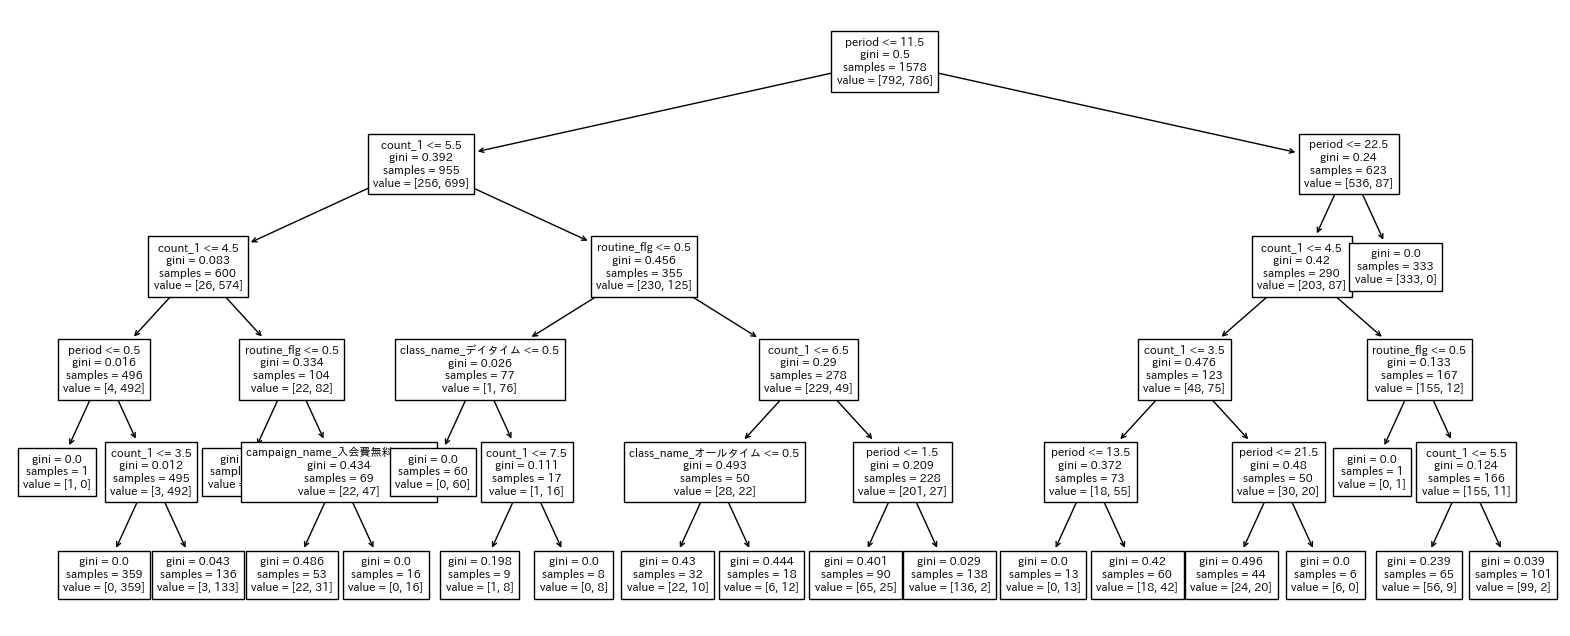

In [22]:
!pip install japanize_matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(model,feature_names=X.columns,fontsize=8)

In [23]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name="入会費無料"
class_name="オールタイム"
gender="M"

In [26]:
if campaign_name == "入会費半額":
  campaign_name_list = [1,0]
elif campaign_name == "入会費無料":
  campaign_name_list=[0,1]
elif campaign_name == "通常":
  campaign_name_list=[0,0]
if class_name == "オールタイム":
  class_name_list=[1,0]
elif class_name == "デイタイム":
  class_name_list=[0,1]
elif class_name == "ナイト":
  class_name_list=[0,0]
if gender == "F":
  gender_list=[1]
elif gender == "M":
  gender_list=[0]
input_data = [count_1,routine_flg,period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)
input_data=pd.DataFrame(data=[input_data],columns=X.columns)

In [27]:
print(model.predict(input_data))
print(model.predict_proba(input_data))

[1.]
[[0. 1.]]
